## Simple example to calculate laplacian matrix  

Consider the following Graph 

node or vertex:
V={1,2,3,4}

edge:
[(1, 2), (1, 3), (2, 4)]

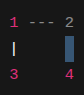

This is the Adjacency Matrix:

The size is 4x4. If there is an edge between i,j vertices the $A_{ij}$ =1 else is $A_{ij}$ = 0

$A = \begin{bmatrix}  0&1&1&0 \\ 1&0&0&1 \\ 1&0&0&0 \\ 0&1&0&0 \end{bmatrix}$


The Degree matrix is diagonal matrix 4x4 where $D_{ii}$ is the number of edges connected to vertex i 

$ D= \begin{bmatrix} 2&0&0&0 \\ 0&2&0&0 \\ 0&0&1&0 \\ 0&0&0&1 \end{bmatrix} $

Therefore the laplacian matrix is here:

$L = D-A = \begin{bmatrix} 2&-1&-1&0 \\ -1&2&0&-1 \\ -1&0&1&0 \\ 0&-1&0&1 \end{bmatrix}$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Adjacency Matrix

In [7]:
A = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

### Degree Matrix

In [9]:
D = np.diag(np.sum(A, axis=1))
D

array([[2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

### Laplacian Matrix

In [12]:
L = D - A
L

array([[ 2, -1, -1,  0],
       [-1,  2,  0, -1],
       [-1,  0,  1,  0],
       [ 0, -1,  0,  1]])

### eigenvalues , eigenvectors

In [16]:
eigenvalues, eigenvectors = np.linalg.eigh(L)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [-1.76298406e-16  5.85786438e-01  2.00000000e+00  3.41421356e+00]
Eigenvectors:
 [[-0.5        -0.27059805  0.5        -0.65328148]
 [-0.5         0.27059805  0.5         0.65328148]
 [-0.5        -0.65328148 -0.5         0.27059805]
 [-0.5         0.65328148 -0.5        -0.27059805]]


### remove the eigenvectors corresponding to the eigenvalue=0 or close to zero
#### Select two dimensional eigenvectors for two dimensional mapping

In [54]:
embedding_vectors = eigenvectors[:, 1:3]

In [55]:
###embedding_vectors = np.concatenate((eigenvectors[:, 1:2], eigenvectors[:, 3:]), axis=1)

### Plot

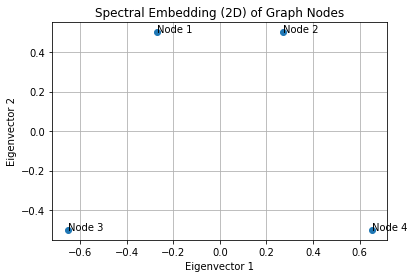

In [56]:
plt.scatter(embedding_vectors[:, 0], embedding_vectors[:, 1])

for i in range(4):
    plt.text(embedding_vectors[i, 0], embedding_vectors[i, 1], f"Node {i+1}")

plt.title("Spectral Embedding (2D) of Graph Nodes")
plt.xlabel("Eigenvector 1")
plt.ylabel("Eigenvector 2")
plt.grid(True)
plt.show()

## Rewrite code with networkx 

In [57]:
import networkx as nx

### Create Graph

In [59]:
G = nx.Graph()

In [62]:
edges = [(1,2), (1,3), (2,4)]

In [63]:
G.add_edges_from(edges)

### Plot Graph 

In [80]:
pos = nx.spring_layout(G)
# pos1 = nx.spiral_layout(G)
# pos1

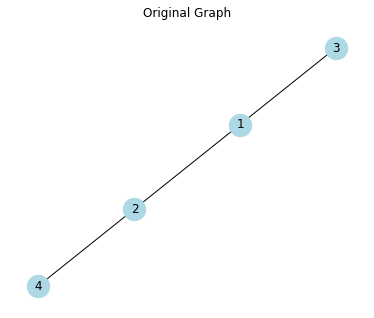

In [82]:
plt.figure(figsize=(5,4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
plt.title("Original Graph")
plt.show()

### Adjacency Matrix

In [88]:
A = nx.adjacency_matrix(G).todense()
A

array([[0, 1, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [89]:
D = np.diag(np.sum(A, axis=1))

In [90]:
D

array([[2, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [91]:
L = D - A

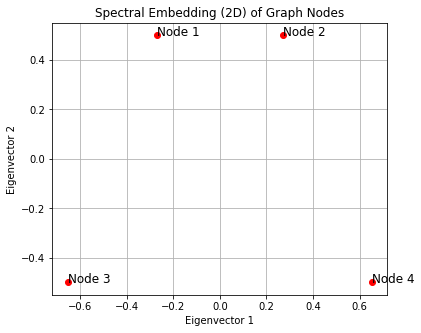

In [92]:
eigenvalues, eigenvectors = np.linalg.eigh(L)
embedding = eigenvectors[:, 1:3]

plt.figure(figsize=(6,5))
plt.scatter(embedding[:, 0], embedding[:, 1], color='red')

for i, (x, y) in enumerate(embedding):
    plt.text(x, y, f"Node {i+1}", fontsize=12)

plt.title("Spectral Embedding (2D) of Graph Nodes")
plt.xlabel("Eigenvector 1")
plt.ylabel("Eigenvector 2")
plt.grid(True)
plt.show()

### Use clustring method 

In [118]:
from sklearn.cluster import KMeans

X = eigenvectors

km = KMeans(n_clusters=2, n_init=10)
labels = km.fit_predict(X)

In [125]:
node_labels = {f"Node {i+1}": int(label) for i, label in enumerate(labels)}

for node, cluster in node_labels.items():
    print(f"{node} -> Cluster {cluster}")

Node 1 -> Cluster 0
Node 2 -> Cluster 0
Node 3 -> Cluster 0
Node 4 -> Cluster 1
